# What is Scatter Plot

---


A scatter plot is a type of data visualization that shows the relationship between two numerical variables on a cartesian plane. Each point on the plot represents a single observation from the dataset, with the x-coordinate representing the value of independent variable and the y-coordinate representing the value of the dependent variable.

# Use Cases of Scatter Plots

---


Scatter plots are versatile tools for data visualization. Here are some common use cases:

*   **Visualizing Relationships:** Explore correlations between two numerical variables.
    *   **Example:** Plotting ice cream sales against temperature to see if there's a positive correlation. As temperature increases, ice cream sales tend to increase as well, indicating a positive correlation.
*   **Identifying Outliers:** Spot data points that deviate significantly from the overall pattern.
    *   **Example:** Identifying unusually high or low performing students based on test scores and study hours. A student with high study hours but low test scores could be an outlier, requiring further investigation.
*   **Showing Clusters/Groups:** Reveal clusters or groups of data points with similar characteristics.
    *   **Example:** Grouping customers based on their purchase history and demographics. Customers with similar purchase patterns and demographics could be grouped for targeted marketing.
*   **Predicting Values:** Estimate the value of one variable based on the value of another if a clear relationship exists.
    *   **Example:** Predicting house prices based on their size and location. Larger houses in desirable locations tend to have higher prices, allowing for price prediction based on these factors.<br>


***`In this lab, we will focus on several real life examples on how to use box plots using a real world dataset. We will also experiment with difference attributes of pie chart for better visualization.`***


# Install dependencies and import libraries

In [169]:
!pip install pandas numpy matplotlib | grep -v "Requirement already satisfied"

This method uses output redirection (>) to send pip's output to a temporary file. Then, it uses grep to filter out the unwanted messages before printing to the console.his will install the packages and only show output lines that don't contain the phrase "Requirement already satisfied".

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

* The line ***`plt.style.use('ggplot')`*** is used to change the visual style of plots created using the matplotlib.pyplot module.\n
* ***`%matplotlib inline`*** ensures that plots generated by Matplotlib are displayed directly within the Jupyter Notebook, instead of opening in separate windows. This makes your visualizations easily viewable and integrated into your notebook's workflow.

In [171]:
import warnings
warnings.filterwarnings('ignore')

The warnings library in Python provides a way to control the display of warning messages. By using ***`filterwarnings('ignore')`***, you essentially tell Python to ignore all warning messages.

# Dataset : The Palmer Penguins

---


The Palmer Penguins Dataset, available at [https://www.kaggle.com/datasets/satyajeetrai/palmer-penguins-dataset-for-eda](https://www.kaggle.com/datasets/satyajeetrai/palmer-penguins-dataset-for-eda), provides a collection of morphometric and observational data pertaining to three penguin species observed at Palmer Station, Antarctica. This dataset, formatted as a comma-separated value (CSV) file, encompasses the following attributes:

* **Species:** The species of the penguin (Adelie, Gentoo, or Chinstrap).
* **Island:** The island on which the penguin was observed (Torgersen, Biscoe, or Dream).
* **Bill Length (mm):** The length of the penguin's bill, measured in millimeters.
* **Bill Depth (mm):** The depth of the penguin's bill, measured in millimeters.
* **Flipper Length (mm):** The length of the penguin's flipper, measured in millimeters.
* **Body Mass (g):** The body mass of the penguin, measured in grams.
* **Sex:** The sex of the penguin.
* **Year:** The year in which the observation was recorded.

This dataset is suitable for statistical analysis, data visualization, and the development of predictive models related to penguin morphology and ecology. It originates from the Palmer Station Long-Term Ecological Research (LTER) program.


# (Optional) Load Dataset From Kaggle

---



> ***You can avoid this section if you want to download dataset directly from kaggle website.***

You can check the below link for better understanding on how to load dataset from Kaggle : https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/


In [161]:
# Install the kaggle library to download datasets
!pip install -q kaggle  # Installs the kaggle library using pip

# Create a directory to store Kaggle API credentials
!mkdir ~/.kaggle  # Creates a hidden directory named '.kaggle' in the user's home directory

# Copy the Kaggle API credentials file to the appropriate location
!cp kaggle.json ~/.kaggle/  # Copies the 'kaggle.json' file to the '.kaggle' directory

# Set the permissions of the Kaggle API credentials file
!chmod 600 ~/.kaggle/kaggle.json  # Changes the permissions of 'kaggle.json' to read and write for the owner only

# Download the Palmer Penguins dataset from Kaggle
!kaggle datasets download satyajeetrai/palmer-penguins-dataset-for-eda  # Downloads the dataset using the Kaggle API

# Unzip the downloaded dataset file
!unzip -o palmer-penguins-dataset-for-eda.zip  # Extracts the contents of the downloaded zip file

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/satyajeetrai/palmer-penguins-dataset-for-eda
License(s): MIT
palmer-penguins-dataset-for-eda.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  palmer-penguins-dataset-for-eda.zip
  inflating: penguins.csv            


In [162]:
dataset = pd.read_csv('penguins.csv')
dataset.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# Exploring and Analyzing the Dataset

---



In [163]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [164]:
# Check for missing values in each column
dataset.isnull().sum()

,0
id,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


# Task 1 : Create a scatter plot for penguin's flipper length Vs mass.

---

The main objective of this task is to  visualize the relationship between a penguin's flipper length and its body mass. You can observe if there's a correlation between these two variables, meaning if penguins with longer flippers tend to have higher body mass

Before plotting scatter, we should check if the columns(penguin's flipper and mass) contain any null values or not. From [Exploring and Analyzing the Dataset](#scrollTo=EfuZgOqk_3Ku&line=1&uniqifier=1) section, we see there are 2 null values in both columns. We will replace those null values for better result.

In [165]:
dataset["flipper_length_mm"].fillna(dataset.flipper_length_mm.mean(), inplace=True)
dataset["body_mass_g"].fillna(dataset.body_mass_g.mean(), inplace=True)

Text(0, 0.5, 'Body Mass (g)')

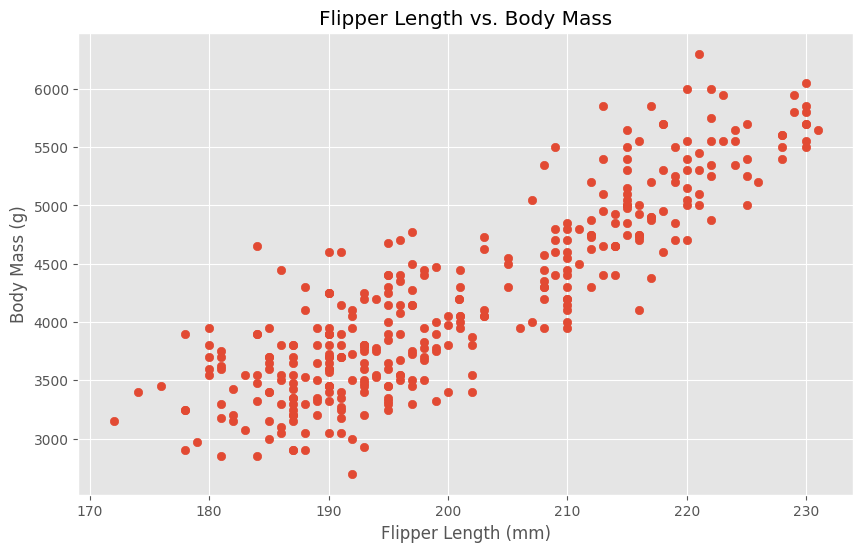

In [166]:
plt.figure(figsize=(10, 6))  # Create a figure with a specific size

plt.scatter(dataset.flipper_length_mm, dataset.body_mass_g)

plt.title('Flipper Length vs. Body Mass')  # Set the title of the plot

plt.xlabel('Flipper Length (mm)')  # Set the label for the x-axis
plt.ylabel('Body Mass (g)')  # Set the label for the y-axis



> The scatter plot shows a positive correlation between flipper length and body mass in penguins. This means that as flipper length increases, body mass tends to increase as well. The relationship appears to be somewhat linear, although there is some scatter of points around the trend.



# Task 2 : Create scatter for penguin's bill length vs mass for different Species.

---

This task aims to visualize the relationship between bill length and body mass in penguins, differentiating data points by species to facilitate comparison. By creating a scatter plot with species-specific markers or colors, we seek to identify potential correlations or patterns within and between penguin species based on these two morphological traits. This analysis will contribute to a deeper understanding of penguin morphology and potential ecological adaptations.

In [167]:
dataset.bill_length_mm.fillna(dataset.bill_length_mm.mean(), inplace=True)

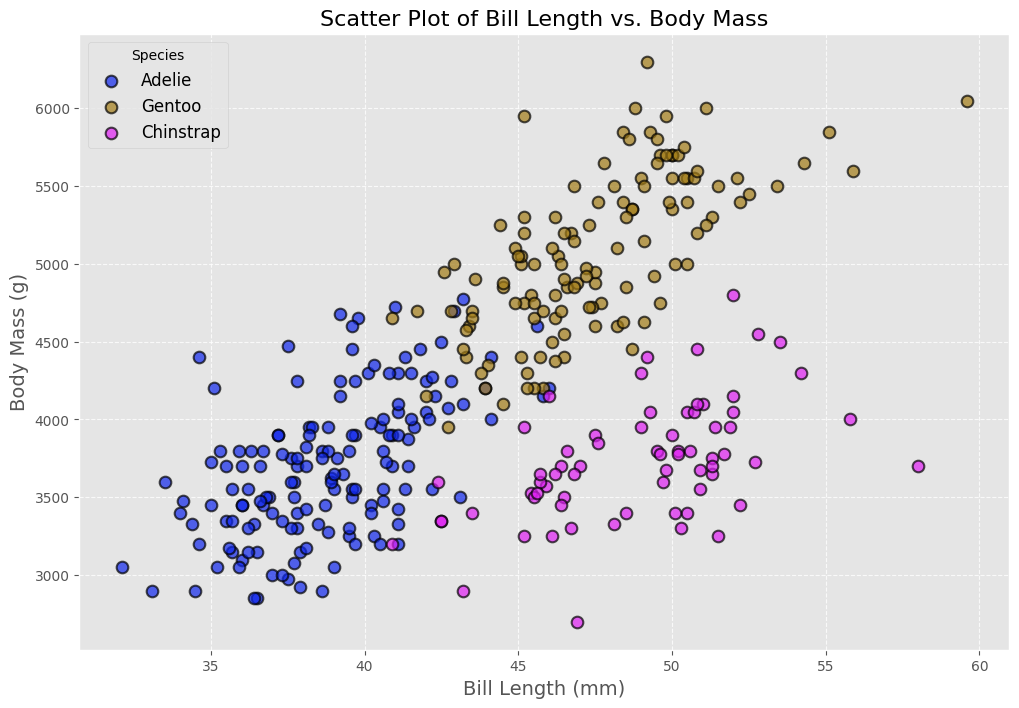

In [168]:
# Get unique categories of species
categories = dataset['species'].unique()

# Assign random RGB color to each species
category_colors = {category: np.random.rand(3) for category in categories}  #

# Create figure and axes
plt.figure(figsize=(12, 8))  # Create a figure with dimensions 12x8 inches
ax = plt.gca()  # Get the current Axes instance

# Scatter plot with customizations
for species, color in category_colors.items():
    species_data = dataset[dataset['species'] == species]
    '''
    Create a scatter plot for the current species with customizations:
    - c: Set the color of the points using the assigned color for the species.
    - alpha: Set the transparency of the points to 0.7.
    - marker: Set the marker style to circles ('o').
    - edgecolors: Set the color of the marker edges to black.
    - linewidth: Set the width of the marker edges to 1.5.
    - label: Set the label for the species in the legend.
    '''
    ax.scatter(
        species_data.bill_length_mm,  # X-axis values (bill length)
        species_data['body_mass_g'],  # Y-axis values (body mass)
        c=color,
        s = 70,
        alpha=0.7,
        marker='o',
        edgecolors='black',
        linewidth=1.5,
        label=species
    )



ax.set_xlabel('Bill Length (mm)', fontsize=14)
ax.set_ylabel('Body Mass (g)', fontsize=14)

ax.set_title('Scatter Plot of Bill Length vs. Body Mass', fontsize=16)

ax.legend(title='Species', fontsize=12)

# Add grid lines with dashed style and transparency 0.8
ax.grid(True, linestyle='--', alpha=0.8)

plt.show()  # Display the plot

1. The plot shows the relationship between bill length and body mass for three different penguin species: Adelie, Chinstrap, and Gentoo.
2. Gentoo penguins tend to have the longest bills and highest body mass, while Adelie and Chinstrap penguins have shorter bills and lower body mass.
3. Each species forms a distinct cluster, indicating species-specific variations in the relationship between bill length and body mass.

# Author
[Md. Arifuzzaman Munaf](https://www.linkedin.com/in/arifuzzaman-munaf/)